In [12]:
from google.colab import drive
import numpy as np
import pandas as pd
import os

drive.mount('/content/drive')

path = '/content/drive/My Drive/MARL_Final_Project_Full_Revised/complete_results.npz'

if path is None:
    print("UYARI: Veri dosyası bulunamadı! Lütfen eğitim kodunu çalıştırıp kaydettiğinizden emin olun.")
    data = {}
else:
    print(f"Loading data from: {path}")
    data = np.load(path, allow_pickle=True)

def get_probs(key, algo, game, cols, condition=None, max_episodes=200):
    expected_cols = cols + ['Episode', 'Algorithm', 'Game']
    if condition: expected_cols.append('Condition')

    if key not in data: return pd.DataFrame(columns=expected_cols)
    item = data[key].item()
    if 'p1_probs' not in item: return pd.DataFrame(columns=expected_cols)

    arr = np.array(item['p1_probs'])

    if algo == "PSRO" and len(arr) == 1:
        arr = np.tile(arr, (max_episodes, 1))

    if arr.ndim != 2 or arr.shape[1] != len(cols):
        return pd.DataFrame(columns=expected_cols)

    df = pd.DataFrame(arr, columns=cols)
    df['Episode'] = range(1, len(df) + 1)
    df['Algorithm'] = algo
    df['Game'] = game
    if condition: df['Condition'] = condition
    return df

def get_metrics(key, algo, game, condition="Clean"):
    expected_cols = ['Reward', 'Episode', 'Algorithm', 'Game', 'Condition']
    if key not in data: return pd.DataFrame(columns=expected_cols)
    item = data[key].item()
    rewards = item.get('rewards', [])
    if len(rewards) == 0: return pd.DataFrame(columns=expected_cols)

    df = pd.DataFrame({'Reward': rewards})
    df['Episode'] = range(1, len(df) + 1)
    df['Algorithm'] = algo
    df['Game'] = game
    df['Condition'] = condition
    return df

# 1. MP
df_mp = pd.concat([
    get_probs('mp_ippo', 'IPPO', 'Matching Pennies', ['Heads', 'Tails']),
    get_probs('mp_mappo', 'MAPPO', 'Matching Pennies', ['Heads', 'Tails']),
    get_probs('mp_nash', 'Nash-Q', 'Matching Pennies', ['Heads', 'Tails']),
    get_probs('mp_minimax', 'Minimax-Q', 'Matching Pennies', ['Heads', 'Tails']),
    get_probs('mp_ceq', 'CE-Q', 'Matching Pennies', ['Heads', 'Tails']),
    get_probs('mp_psro', 'PSRO', 'Matching Pennies', ['Heads', 'Tails']),
    get_probs('mp_fof', 'FoF-Q', 'Matching Pennies', ['Heads', 'Tails']),
    get_probs('mp_lola', 'LOLA', 'Matching Pennies', ['Heads', 'Tails'])
])

# 2. RPS
df_rps = pd.concat([
    get_probs('rps_ippo', 'IPPO', 'RPS', ['Rock', 'Paper', 'Scissors']),
    get_probs('rps_mappo', 'MAPPO', 'RPS', ['Rock', 'Paper', 'Scissors']),
    get_probs('rps_nash', 'Nash-Q', 'RPS', ['Rock', 'Paper', 'Scissors']),
    get_probs('rps_minimax', 'Minimax-Q', 'RPS', ['Rock', 'Paper', 'Scissors']),
    get_probs('rps_ceq', 'CE-Q', 'RPS', ['Rock', 'Paper', 'Scissors']),
    get_probs('rps_psro', 'PSRO', 'RPS', ['Rock', 'Paper', 'Scissors']),
    get_probs('rps_fof', 'FoF-Q', 'RPS', ['Rock', 'Paper', 'Scissors']),
    get_probs('rps_lola', 'LOLA', 'RPS', ['Rock', 'Paper', 'Scissors'])
])

# 3. IPD
df_ipd = pd.concat([
    get_probs('ipd_ippo', 'IPPO', 'Iterated PD', ['Cooperate', 'Defect']),
    get_probs('ipd_mappo', 'MAPPO', 'Iterated PD', ['Cooperate', 'Defect']),
    get_probs('ipd_nash', 'Nash-Q', 'Iterated PD', ['Cooperate', 'Defect']),
    get_probs('ipd_fof', 'FoF-Q', 'Iterated PD', ['Cooperate', 'Defect']),
    get_probs('ipd_minimax', 'Minimax-Q', 'Iterated PD', ['Cooperate', 'Defect']),
    get_probs('ipd_ceq', 'CE-Q', 'Iterated PD', ['Cooperate', 'Defect']),
    get_probs('ipd_psro', 'PSRO', 'Iterated PD', ['Cooperate', 'Defect']),
    get_probs('ipd_lola', 'LOLA', 'Iterated PD', ['Cooperate', 'Defect']),
    get_probs('ipd_pac', 'Pareto-AC', 'Iterated PD', ['Cooperate', 'Defect'])
])

# 4. One Shot PD
df_ipd_oneshot = pd.concat([
    get_probs('pd_oneshot_ippo', 'IPPO', 'One-Shot PD', ['Cooperate', 'Defect']),
    get_probs('pd_oneshot_nash', 'Nash-Q', 'One-Shot PD', ['Cooperate', 'Defect']),
    get_probs('pd_oneshot_minimax', 'Minimax-Q', 'One-Shot PD', ['Cooperate', 'Defect']),
    get_probs('pd_oneshot_ceq', 'CE-Q', 'One-Shot PD', ['Cooperate', 'Defect']),
    get_probs('pd_oneshot_fof', 'FoF-Q', 'One-Shot PD', ['Cooperate', 'Defect']),
    get_probs('pd_oneshot_lola', 'LOLA', 'One-Shot PD', ['Cooperate', 'Defect'])
])

# 5. Bots
bots = ['TitForTat', 'Random', 'Bully']
algos_vs_bots = [
    ('ippo', 'IPPO'), ('nash', 'Nash-Q'), ('minimax', 'Minimax-Q'),
    ('ceq', 'CE-Q'), ('fof', 'FoF-Q')
]
bot_dfs = []
for bot in bots:
    for code, name in algos_vs_bots:
        key = f'ipd_vs_{bot}_{code}'
        bot_dfs.append(get_probs(key, name, f'vs {bot}', ['Cooperate', 'Defect']))
df_ipd_bots = pd.concat(bot_dfs) if bot_dfs else pd.DataFrame()

# 6. BoS
df_bos = pd.concat([
    get_probs('bos_ippo', 'IPPO', 'BoS', ['Opera', 'Football']),
    get_probs('bos_nash', 'Nash-Q', 'BoS', ['Opera', 'Football']),
    get_probs('bos_minimax', 'Minimax-Q', 'BoS', ['Opera', 'Football']),
    get_probs('bos_ceq', 'CE-Q', 'BoS', ['Opera', 'Football']),
    get_probs('bos_psro', 'PSRO', 'BoS', ['Opera', 'Football']),
    get_probs('bos_fof', 'FoF-Q', 'BoS', ['Opera', 'Football'])
])

# 7. Spread
df_spread = pd.concat([
    get_metrics('spread_ippo', 'IPPO', 'Simple Spread', 'Clean'),
    get_metrics('spread_mappo', 'MAPPO', 'Simple Spread', 'Clean'),
    get_metrics('spread_qmix', 'QMIX', 'Simple Spread', 'Clean'),
    get_metrics('spread_pac', 'Pareto-AC', 'Simple Spread', 'Clean'),
    get_metrics('spread_ippo_noisy', 'IPPO', 'Simple Spread', 'Noisy'),
    get_metrics('spread_mappo_noisy', 'MAPPO', 'Simple Spread', 'Noisy'),
    get_metrics('spread_qmix_noisy', 'QMIX', 'Simple Spread', 'Noisy'),
    get_metrics('spread_pac_noisy', 'Pareto-AC', 'Simple Spread', 'Noisy')
])

print("Dataframes created.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loading data from: /content/drive/My Drive/MARL_Final_Project_Full_Revised/complete_results.npz
Dataframes created.


In [13]:
%load_ext rpy2.ipython
%config InlineBackend.figure_format = 'retina'

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [14]:
%%R
install.packages("tidyverse")
install.packages("reshape2")
install.packages("scatterplot3d")
install.packages("zoo")
install.packages("gridExtra")

library(tidyverse)
library(reshape2)
library(scatterplot3d)
library(zoo)
library(gridExtra)

theme_set(theme_minimal(base_size = 16) +
          theme(
            plot.title = element_text(hjust = 0.5, face = "bold", margin = margin(b = 10)),
            plot.subtitle = element_text(hjust = 0.5, margin = margin(b = 10)),
            axis.title = element_text(face = "bold"),
            strip.text = element_text(face = "bold", size = 14)
          ))

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'https://cran.rstudio.com/src/contrib/tidyverse_2.0.0.tar.gz'
Content type 'application/x-gzip' length 704618 bytes (688 KB)
downloaded 688 KB


The downloaded source packages are in
	‘/tmp/Rtmpj7NlS0/downloaded_packages’
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'https://cran.rstudio.com/src/contrib/reshape2_1.4.5.tar.gz'
Content type 'application/x-gzip' length 38080 bytes (37 KB)
downloaded 37 KB


The downloaded source packages are in
	‘/tmp/Rtmpj7NlS0/downloaded_packages’
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'https://cran.rstudio.com/src/contrib/scatterplot3d_0.3-44.tar.gz'
Content type 'application/x-gzip' length 475696 bytes (464 KB)
downloaded 464 KB


The downloaded source packages are in
	‘/tmp/Rtmpj7NlS0/downloaded_packages’
Installing package into ‘/usr/local/lib/R/site-library

/usr/local/lib/python3.12/dist-packages/rpy2/robjects/pandas2ri.py:56: UserWarning: DataFrame contains duplicated elements in the index, which will lead to loss of the row names in the resulting data.frame
  warnings.warn('DataFrame contains duplicated elements in the index, '


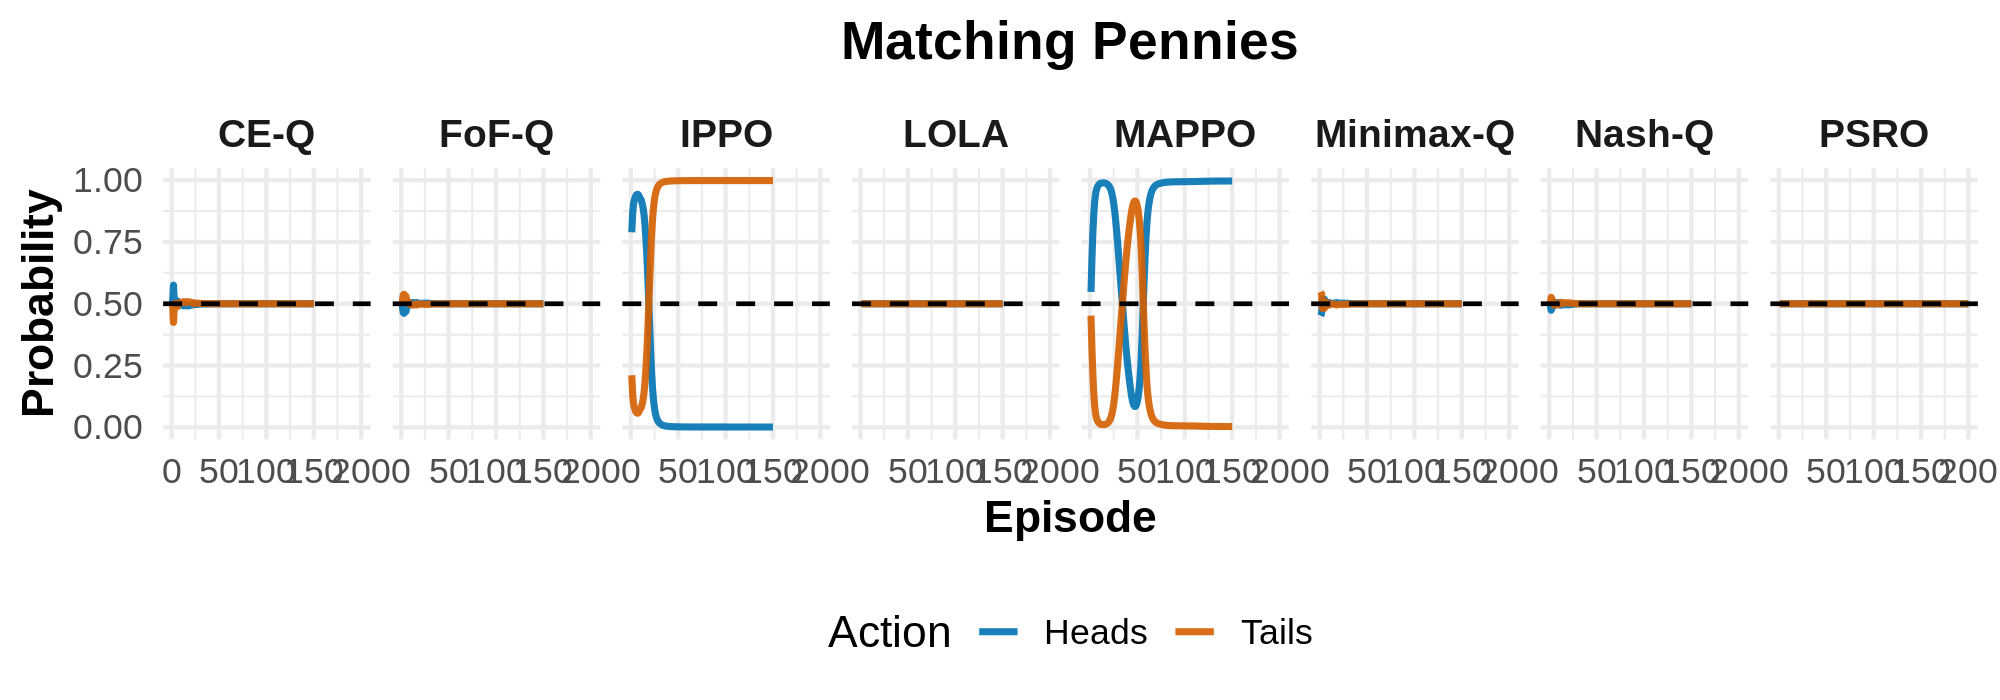

In [15]:
%%R -i df_mp -w 2000 -h 700 -r 200
df_mp_long <- melt(df_mp, id.vars=c("Episode", "Algorithm", "Game"),
                   variable.name="Action", value.name="Probability")

ggplot(df_mp_long, aes(x=Episode, y=Probability, color=Action)) +
  geom_line(size=1.2, alpha=0.9) +
  facet_wrap(~Algorithm, nrow=1) +
  geom_hline(yintercept=0.5, linetype="dashed", color="black", size=0.8) +
  scale_color_manual(values=c("Heads"="#0072B2", "Tails"="#D55E00")) +
  labs(title="Matching Pennies",
       y="Probability", x="Episode") +
  theme(legend.position="bottom")

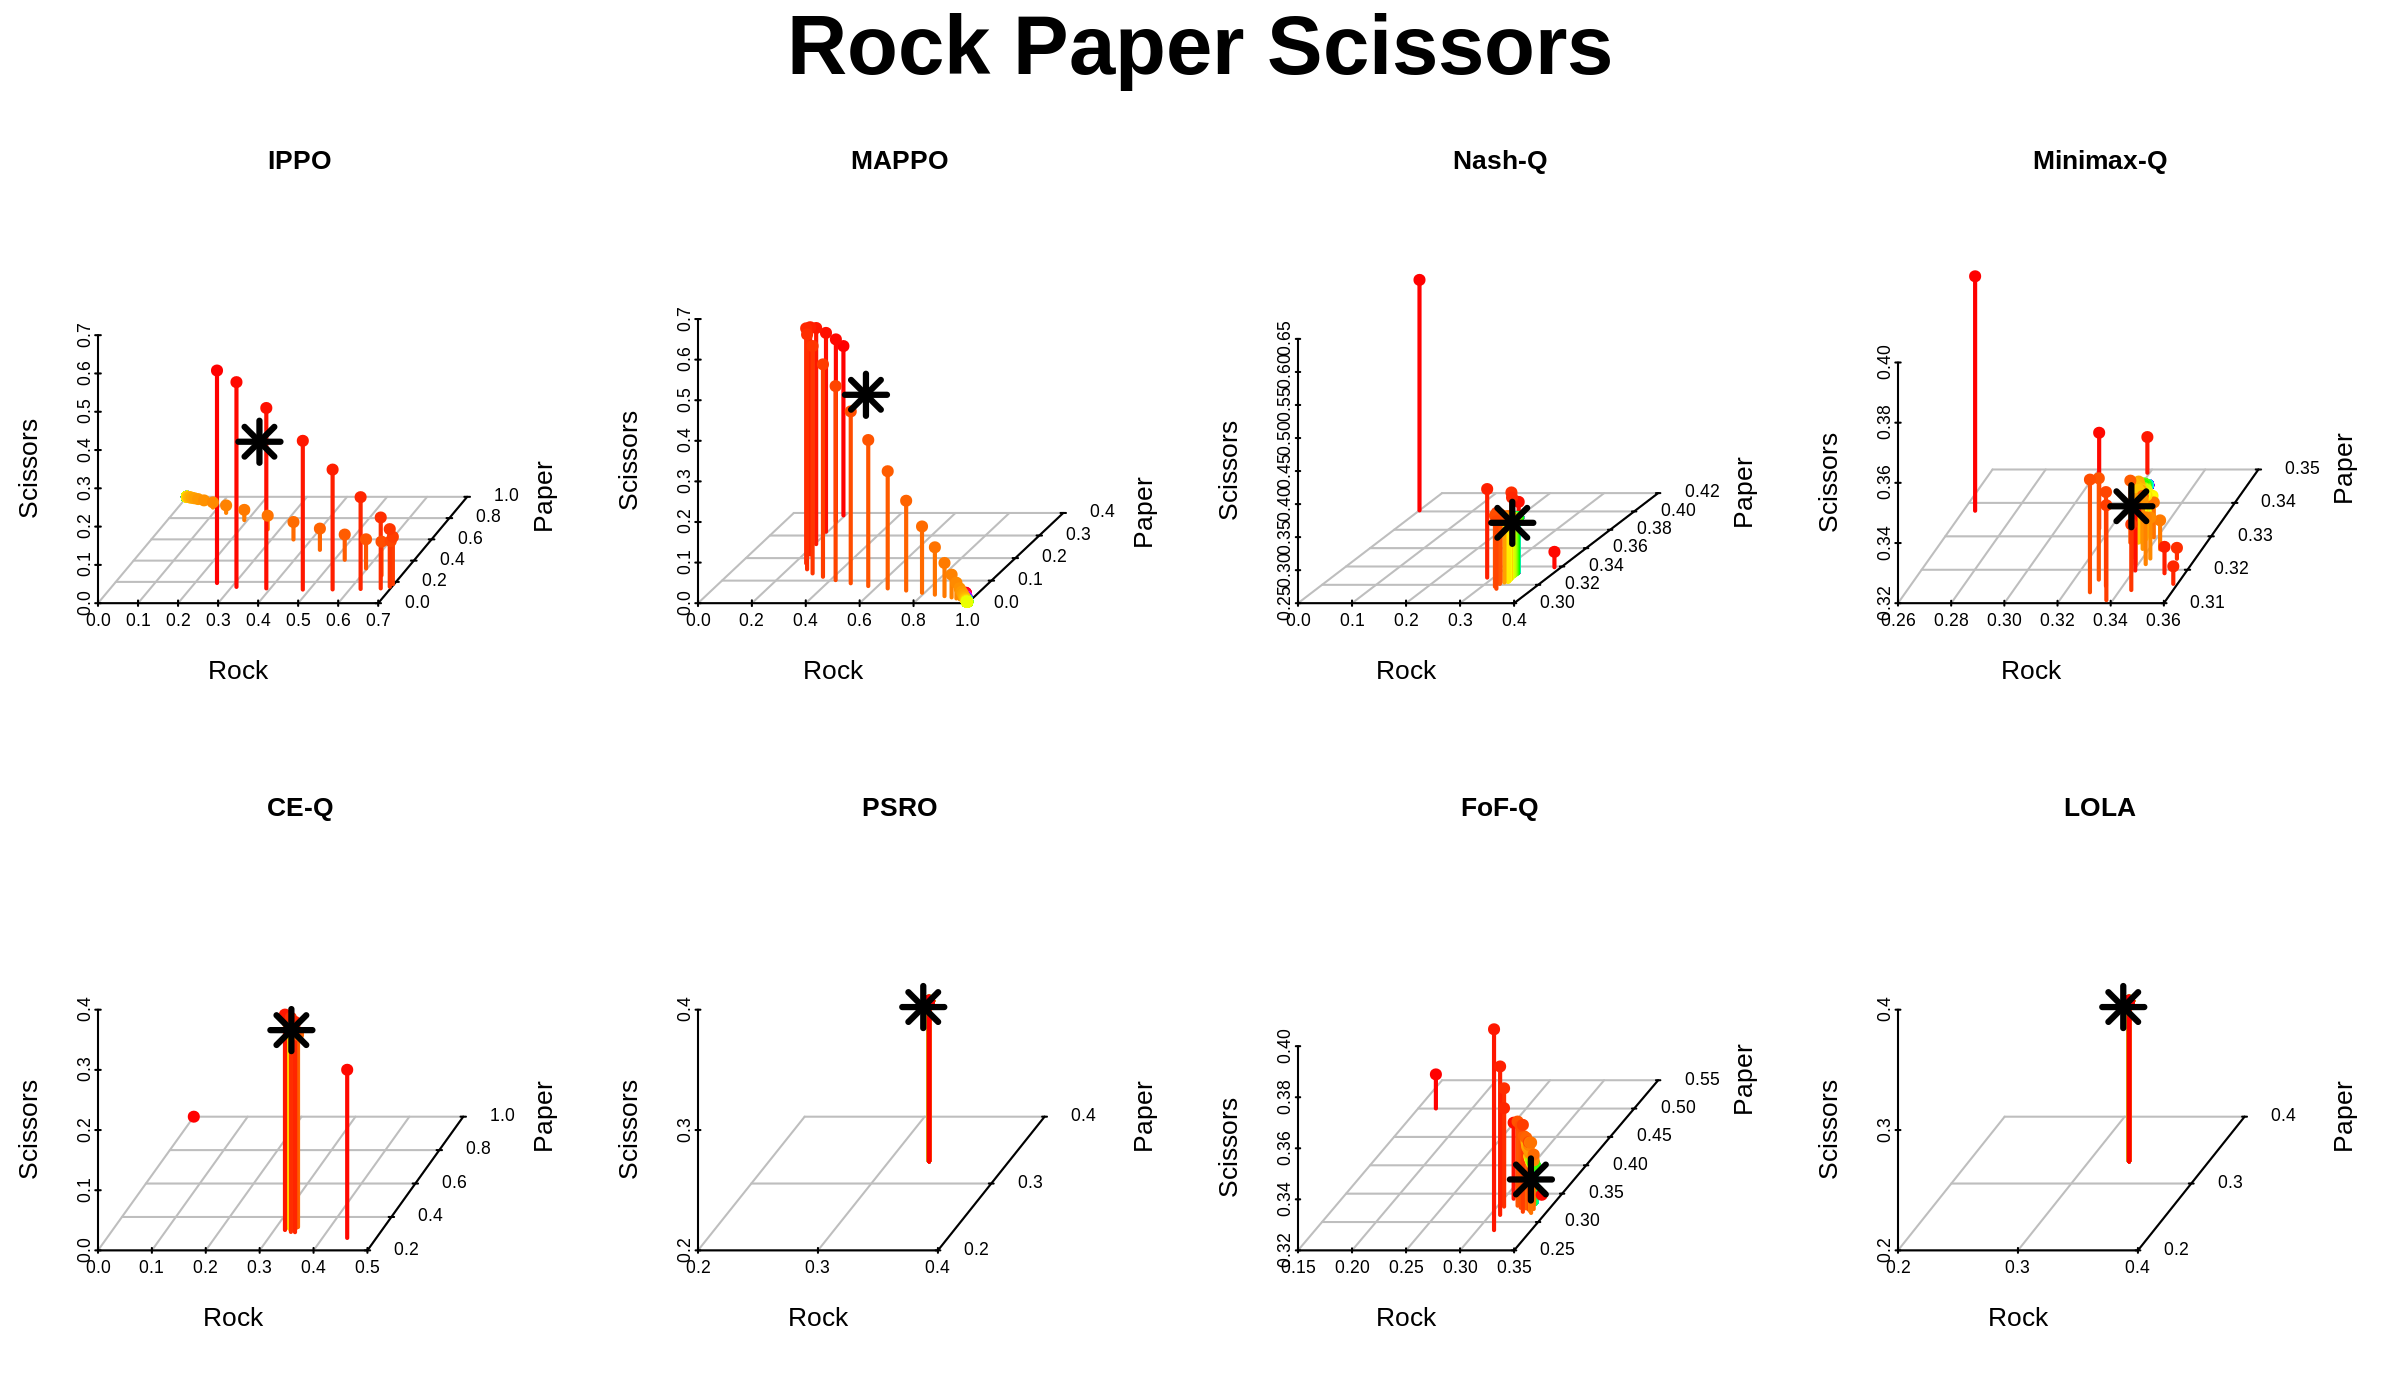

In [16]:
%%R -i df_rps -w 2400 -h 1400 -r 200
par(mfrow=c(2,4), mar=c(4, 5, 4, 2) + 0.1, oma=c(0,0,4,0))

algos <- unique(df_rps$Algorithm)

for(algo in algos) {
  data_sub <- subset(df_rps, Algorithm == algo)
  colors <- rainbow(nrow(data_sub))

  s3d <- scatterplot3d(
    x = data_sub$Rock,
    y = data_sub$Paper,
    z = data_sub$Scissors,
    main = algo,
    xlab = "Rock", ylab = "Paper", zlab = "Scissors",
    color = colors,
    pch = 19,
    type = "h",
    lwd = 2,
    cex.symbols = 0.8,
    angle = 50,
    y.margin.add = 0.3,
    cex.axis = 0.8,
    cex.lab = 1.2,
    grid = TRUE,
    box = FALSE
  )
  s3d$points3d(0.33, 0.33, 0.33, col="black", pch=8, cex=3, lwd=3)
}

mtext("Rock Paper Scissors", side=3, line=1, outer=TRUE, cex=2.5, font=2)

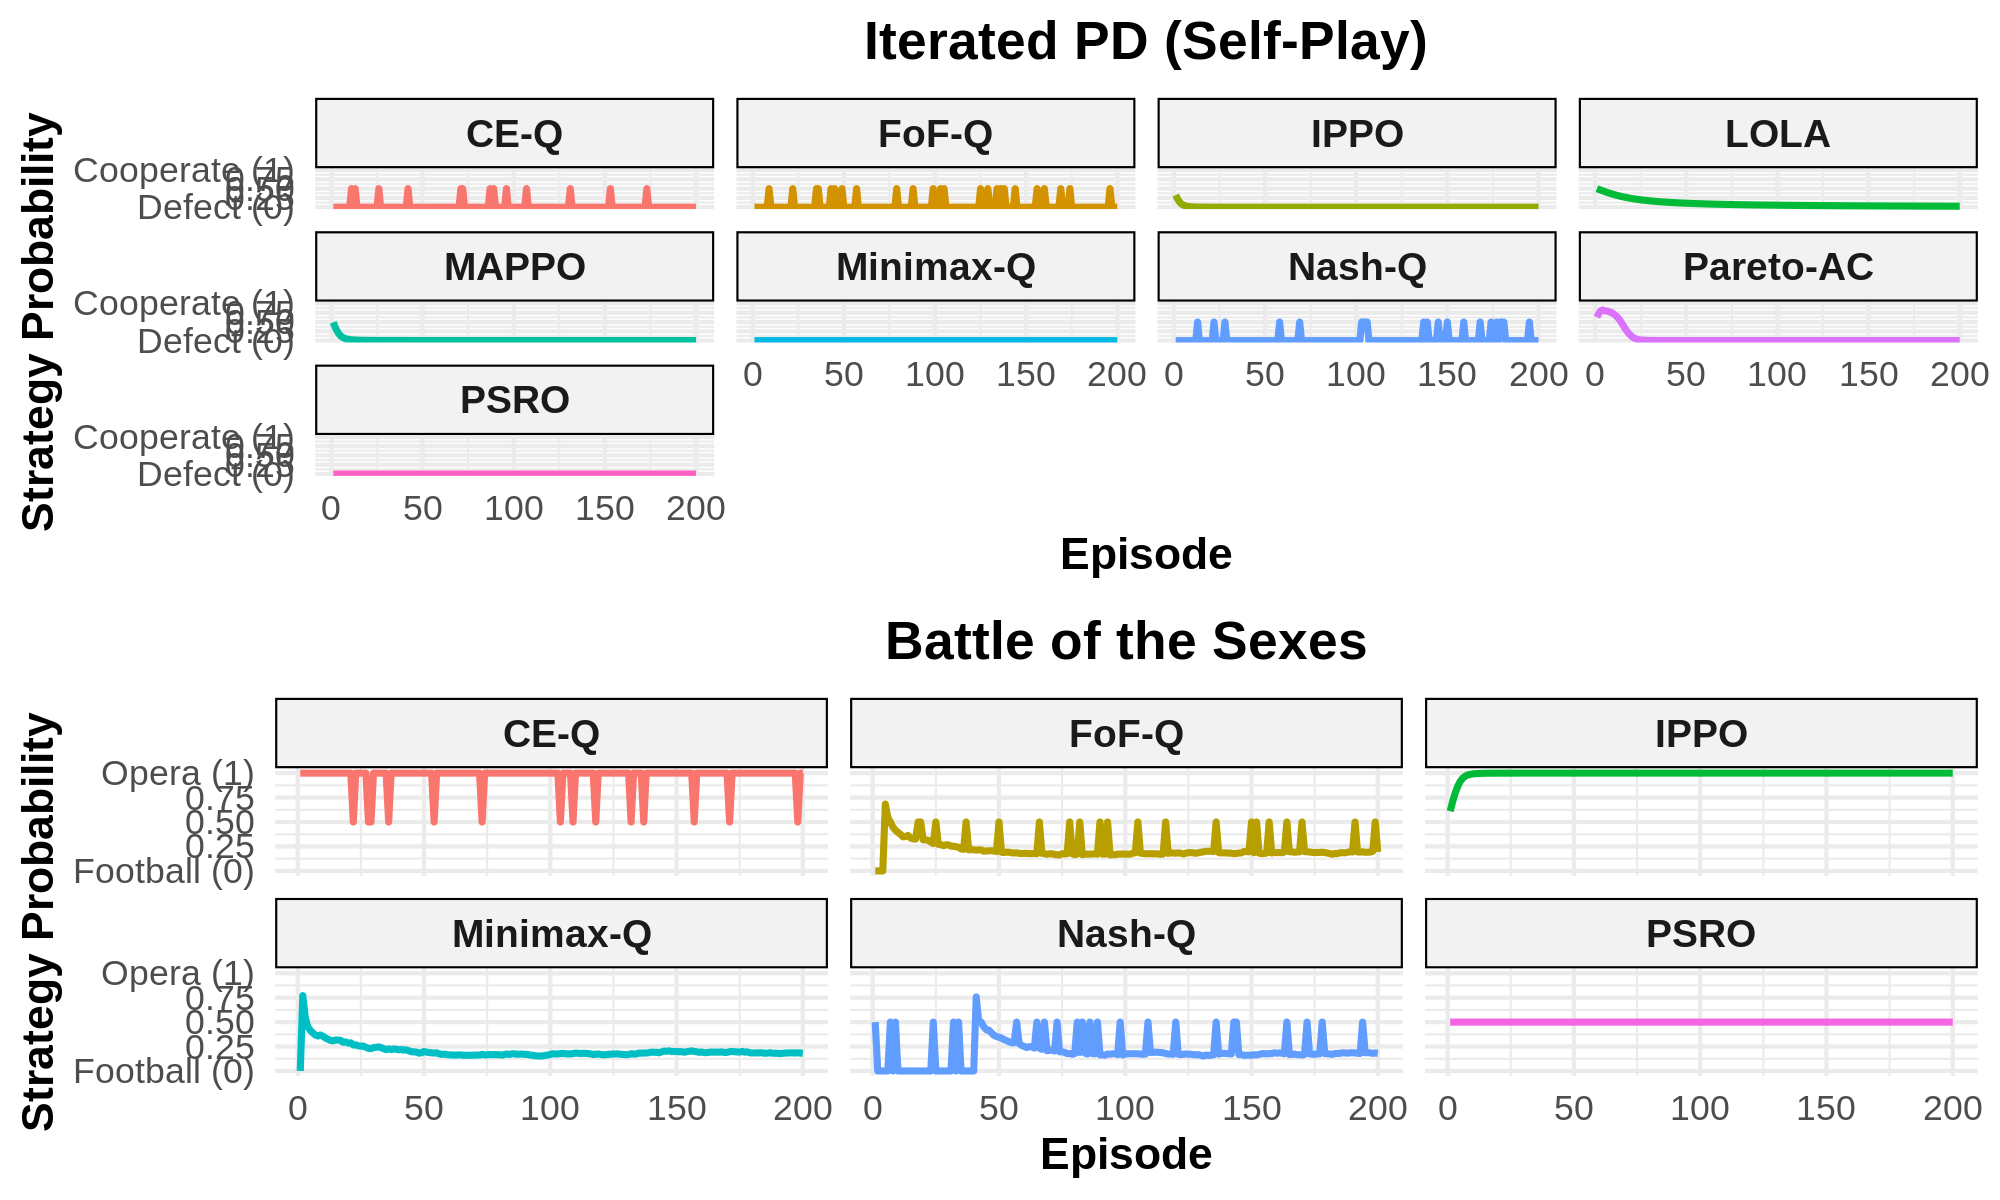

In [17]:
%%R -i df_ipd -i df_bos -w 2000 -h 1200 -r 200

# IPD Plot
y_breaks <- c(0, 0.25, 0.5, 0.75, 1)
y_labels <- c("Defect (0)", "0.25", "0.50", "0.75", "Cooperate (1)")

p_ipd <- ggplot(df_ipd, aes(x=Episode, y=Cooperate, color=Algorithm)) +
  geom_line(size=1.2) +
  facet_wrap(~Algorithm, ncol=4) +
  scale_y_continuous(breaks = y_breaks, labels = y_labels, limits = c(0, 1)) +
  labs(title="Iterated PD (Self-Play)", y="Strategy Probability") +
  theme(legend.position="none", strip.background = element_rect(fill="gray95"))

# BoS Plot
y_breaks_bos <- c(0, 0.25, 0.5, 0.75, 1)
y_labels_bos <- c("Football (0)", "0.25", "0.50", "0.75", "Opera (1)")

p_bos <- ggplot(df_bos, aes(x=Episode, y=Opera, color=Algorithm)) +
  geom_line(size=1.2) +
  facet_wrap(~Algorithm, ncol=3) +
  scale_y_continuous(breaks = y_breaks_bos, labels = y_labels_bos, limits = c(0, 1)) +
  labs(title="Battle of the Sexes", y="Strategy Probability") +
  theme(legend.position="none", strip.background = element_rect(fill="gray95"))

grid.arrange(p_ipd, p_bos, nrow=2)

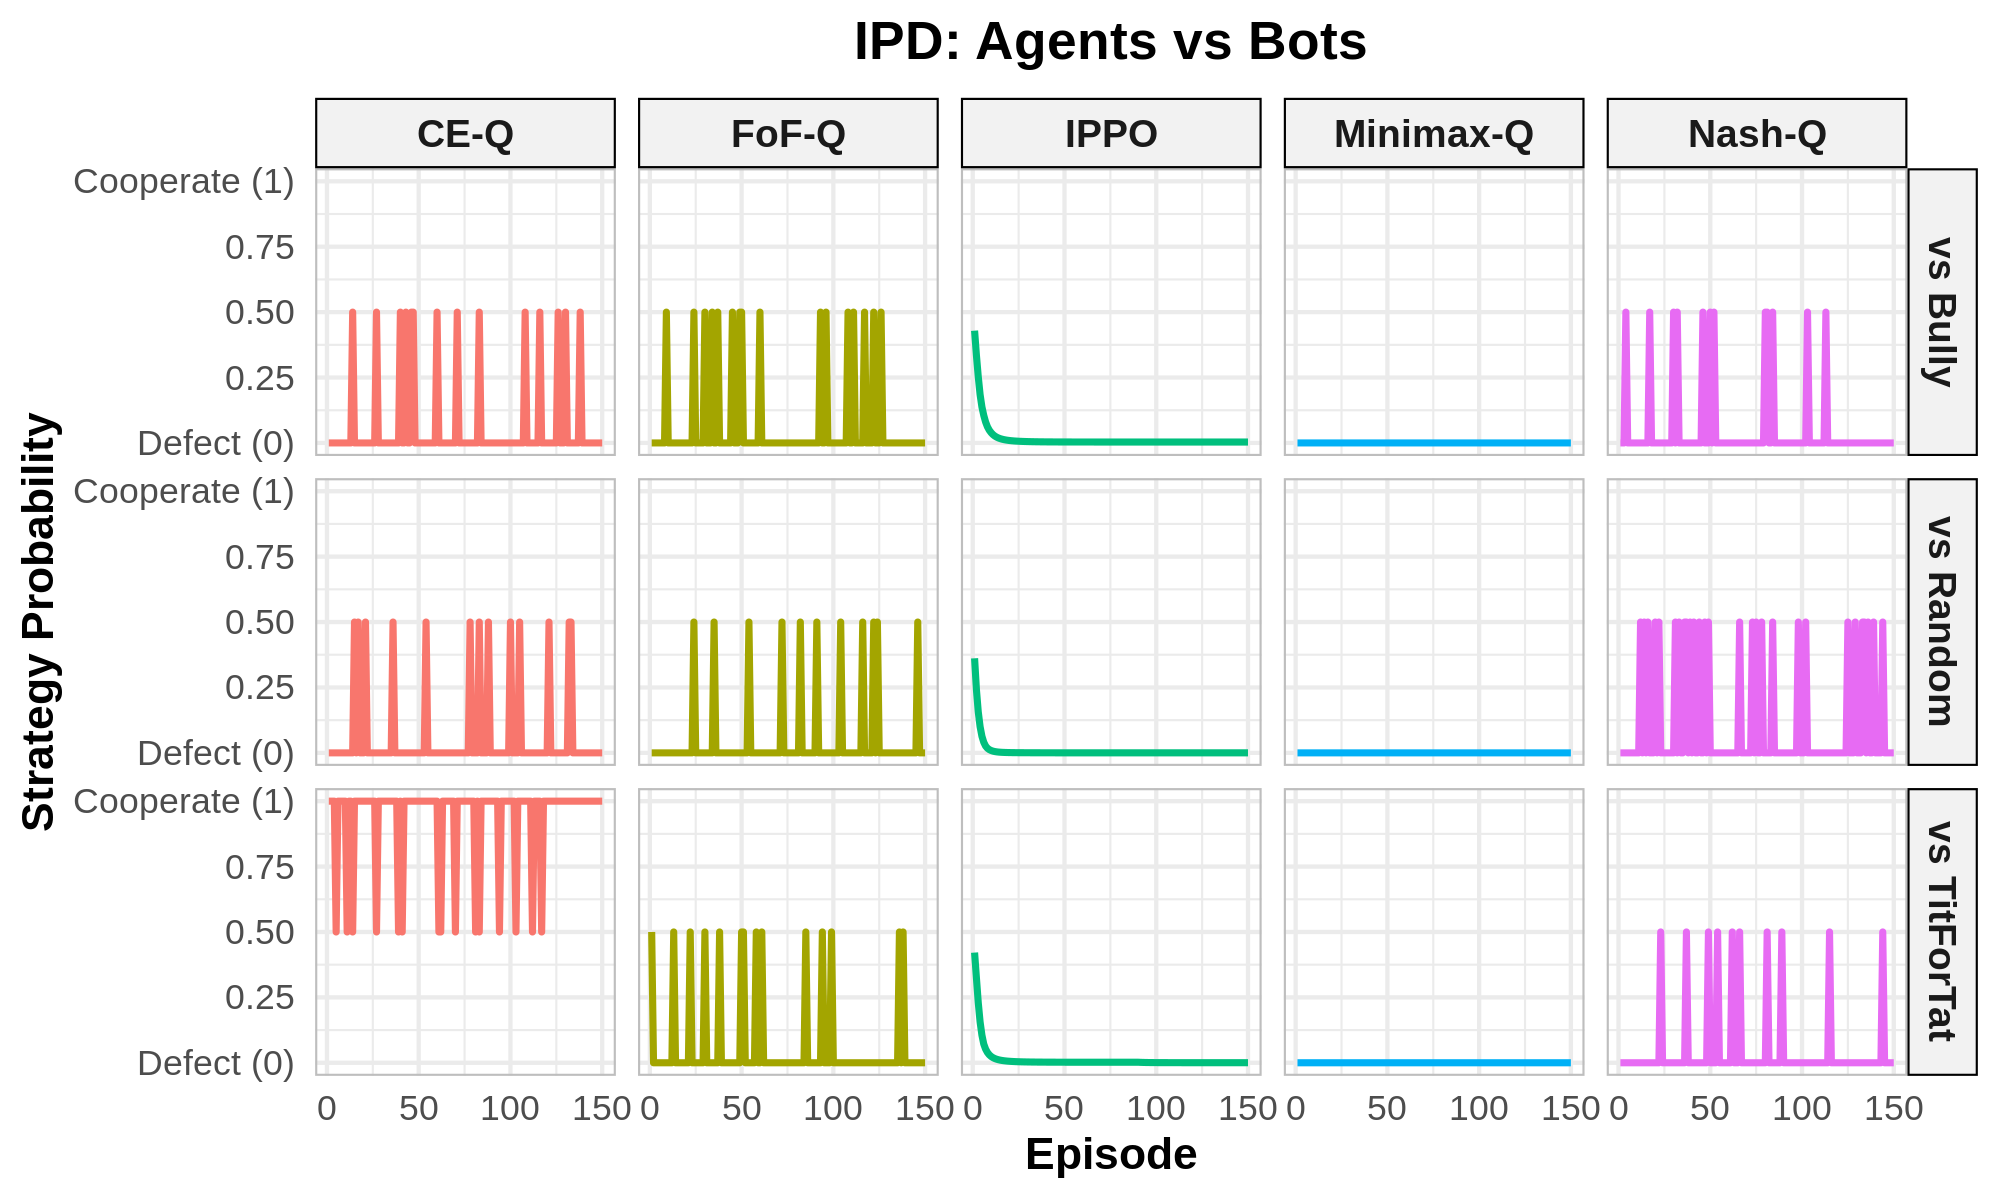

In [18]:
%%R -i df_ipd_bots -w 2000 -h 1200 -r 200
if (nrow(df_ipd_bots) > 0) {
  y_breaks <- c(0, 0.25, 0.5, 0.75, 1)
  y_labels <- c("Defect (0)", "0.25", "0.50", "0.75", "Cooperate (1)")

  ggplot(df_ipd_bots, aes(x=Episode, y=Cooperate, color=Algorithm)) +
    geom_line(size=1.2) +
    facet_grid(Game ~ Algorithm) +
    scale_y_continuous(breaks = y_breaks, labels = y_labels, limits = c(0, 1)) +
    labs(title="IPD: Agents vs Bots",
         y="Strategy Probability") +
    theme(legend.position="none",
          strip.background = element_rect(fill="gray95"),
          panel.border = element_rect(color="gray", fill=NA))
} else {
  plot.new()
  text(0.5, 0.5, "NO DATA AVAILABLE", cex=2)
}

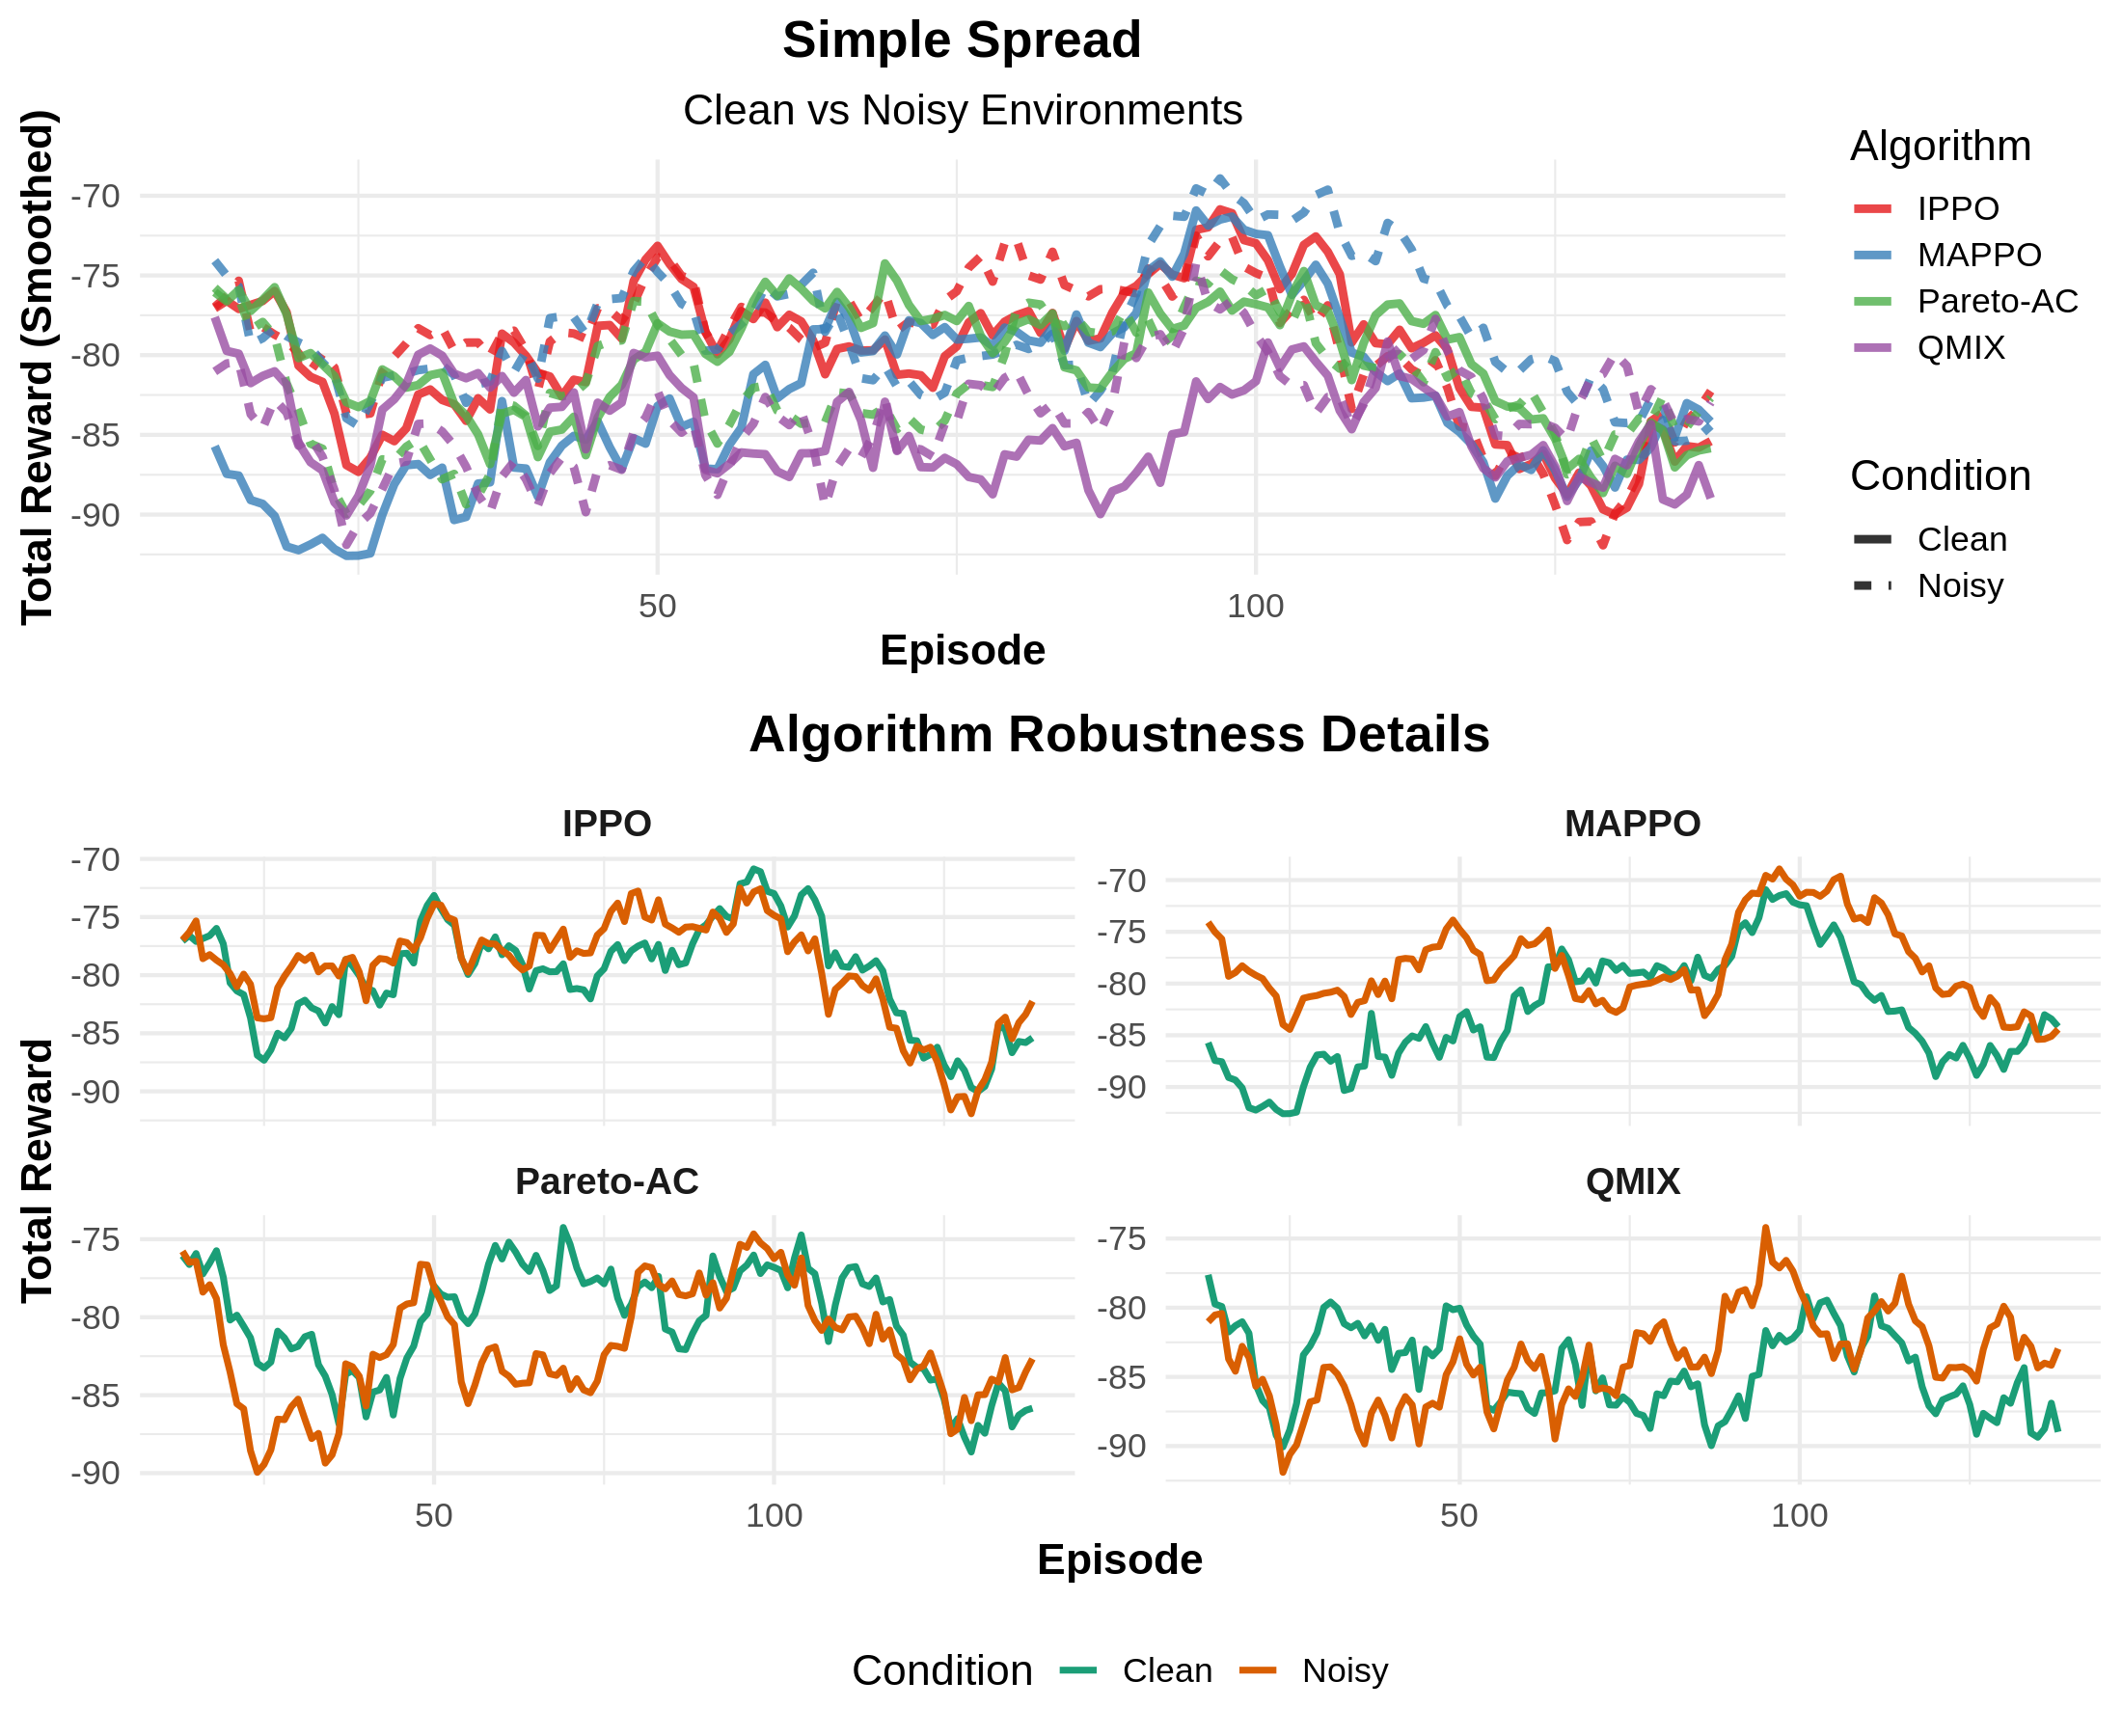

In [19]:
%%R -i df_spread -w 2200 -h 1800 -r 200
df_smooth <- df_spread %>%
  group_by(Algorithm, Condition) %>%
  mutate(Reward_Smooth = zoo::rollmean(Reward, k=25, fill=NA)) %>%
  na.omit()

# 1. Combined Plot
p_comb_spread <- ggplot(df_smooth, aes(x=Episode, y=Reward_Smooth, color=Algorithm, linetype=Condition)) +
  geom_line(size=1.5, alpha=0.8) +
  scale_color_brewer(palette="Set1") +
  labs(title="Simple Spread",
       subtitle="Clean vs Noisy Environments",
       y="Total Reward (Smoothed)") +
  theme(legend.position="right")

# 2. Faceted Plot
p_facet_spread <- ggplot(df_smooth, aes(x=Episode, y=Reward_Smooth, color=Condition)) +
  geom_line(size=1.2) +
  facet_wrap(~Algorithm, scales="free_y", ncol=2) +
  scale_color_manual(values=c("Clean"="#1b9e77", "Noisy"="#d95f02")) +
  labs(title="Algorithm Robustness Details",
       y="Total Reward") +
  theme(legend.position="bottom")

grid.arrange(p_comb_spread, p_facet_spread, nrow=2, heights=c(1, 1.5))

In [20]:
import os
import shutil
from google.colab import files

folder_name = "MARL_Plots_PDF"
if os.path.exists(folder_name):
    shutil.rmtree(folder_name)
os.makedirs(folder_name)

In [21]:
%%R -i df_mp -i df_rps -i df_ipd -i df_ipd_oneshot -i df_ipd_bots -i df_spread -i df_bos

# 1. MP
pdf("MARL_Plots_PDF/01_Matching_Pennies.pdf", width = 12, height = 5)
if(nrow(df_mp) > 0) {
  df_mp_long <- melt(df_mp, id.vars=c("Episode", "Algorithm", "Game"), variable.name="Action", value.name="Probability")
  print(ggplot(df_mp_long, aes(x=Episode, y=Probability, color=Action)) +
    geom_line(size=1, alpha=0.9) + facet_wrap(~Algorithm, nrow=1) +
    geom_hline(yintercept=0.5, linetype="dashed", color="black", size=0.6) +
    scale_color_manual(values=c("Heads"="#0072B2", "Tails"="#D55E00")) +
    labs(title="Matching Pennies", y="Probability") + theme(legend.position="bottom"))
} else { plot.new(); text(0.5,0.5,"NO MP DATA") }
dev.off()

# 2. RPS
pdf("MARL_Plots_PDF/02_RPS_3D.pdf", width = 16, height = 10)
if(nrow(df_rps) > 0) {
  par(mfrow=c(2,4), mar=c(4, 5, 4, 2) + 0.1, oma=c(0,0,4,0))
  algos <- unique(df_rps$Algorithm)
  for(algo in algos) {
    d <- subset(df_rps, Algorithm == algo)
    if(nrow(d) > 0){
      s3d <- scatterplot3d(x=d$Rock, y=d$Paper, z=d$Scissors, main=algo, xlab="Rock", ylab="Paper", zlab="Scissors",
        color=rainbow(nrow(d)), pch=19, type="h", lwd=2, cex.symbols=0.8, angle=50, grid=TRUE, box=FALSE)
      s3d$points3d(0.33, 0.33, 0.33, col="black", pch=8, cex=3, lwd=3)
    }
  }
  mtext("Rock Paper Scissors", side=3, line=1, outer=TRUE, cex=2, font=2)
} else { plot.new(); text(0.5,0.5,"NO RPS DATA") }
dev.off()

# 3. IPD
pdf("MARL_Plots_PDF/03_Iterated_PD.pdf", width = 14, height = 10)
if(nrow(df_ipd) > 0) {
  df_coop <- df_ipd %>% select(Episode, Algorithm, Cooperate)
  y_breaks <- c(0, 0.25, 0.5, 0.75, 1)
  y_labels <- c("Defect (0)", "0.25", "0.50", "0.75", "Cooperate (1)")

  p1 <- ggplot(df_coop, aes(x=Episode, y=Cooperate, color=Algorithm)) +
    geom_line(size=1.2, alpha=0.8) +
    scale_y_continuous(breaks = y_breaks, labels = y_labels, limits = c(0, 1)) +
    labs(title="Iterated PD", y="Strategy Probability") +
    theme(legend.position="bottom")

  p2 <- ggplot(df_coop, aes(x=Episode, y=Cooperate, color=Algorithm)) +
    geom_line(size=1) +
    facet_wrap(~Algorithm, ncol=3) +
    scale_y_continuous(breaks = y_breaks, labels = y_labels, limits = c(0, 1)) +
    labs(y="Strategy Probability") +
    theme(legend.position="none")

  grid.arrange(p1, p2, nrow=2, heights=c(1, 1.5))
} else { plot.new(); text(0.5,0.5,"NO IPD DATA") }
dev.off()

# 4. One-Shot PD
pdf("MARL_Plots_PDF/04_OneShot_PD.pdf", width = 14, height = 8)
if(nrow(df_ipd_oneshot) > 0) {
  df_os_coop <- df_ipd_oneshot %>% select(Episode, Algorithm, Cooperate)
  y_breaks <- c(0, 0.25, 0.5, 0.75, 1)
  y_labels <- c("Defect (0)", "0.25", "0.50", "0.75", "Cooperate (1)")

  print(ggplot(df_os_coop, aes(x=Episode, y=Cooperate, color=Algorithm)) +
    geom_line(size=1.5) +
    facet_wrap(~Algorithm, ncol=2) +
    scale_y_continuous(breaks = y_breaks, labels = y_labels, limits = c(0, 1)) +
    labs(title="One-Shot PD", y="Strategy Probability") +
    theme(legend.position="bottom",
          strip.text = element_text(face="bold", size=12),
          axis.text.y = element_text(size=10)))
} else { plot.new(); text(0.5,0.5,"NO ONE-SHOT DATA") }
dev.off()

# 5. Bots
pdf("MARL_Plots_PDF/05_IPD_vs_Bots.pdf", width = 16, height = 10)
if (nrow(df_ipd_bots) > 0) {
  y_breaks <- c(0, 0.25, 0.5, 0.75, 1)
  y_labels <- c("Defect (0)", "0.25", "0.50", "0.75", "Cooperate (1)")

  print(ggplot(df_ipd_bots, aes(x=Episode, y=Cooperate, color=Algorithm)) +
    geom_line(size=1.2) +
    facet_grid(Game ~ Algorithm) +
    scale_y_continuous(breaks = y_breaks, labels = y_labels, limits = c(0, 1)) +
    labs(title="IPD: Agents vs Bots", y="Strategy Probability") +
    theme(legend.position="none",
          strip.background = element_rect(fill="gray95"),
          panel.border = element_rect(color="gray", fill=NA)))
} else {
  plot.new()
  text(0.5, 0.5, "NO DATA AVAILABLE", cex=2)
}
dev.off()

# 6. BoS
pdf("MARL_Plots_PDF/06_BoS.pdf", width = 14, height = 6)
if(nrow(df_bos) > 0) {
  print(ggplot(df_bos, aes(x=Episode, y=Opera, color=Algorithm)) +
    geom_line(size=1.2) + facet_wrap(~Algorithm, ncol=3) +
    scale_y_continuous(breaks = c(0,0.25,0.5,0.75,1), limits=c(0,1)) +
    labs(title="Battle of the Sexes", y="Prob(Opera)") + theme(legend.position="none"))
} else { plot.new(); text(0.5,0.5,"NO BoS DATA") }
dev.off()

# 7. Spread
pdf("MARL_Plots_PDF/07_Simple_Spread.pdf", width = 14, height = 12)
if(nrow(df_spread) > 0) {
  df_s <- df_spread %>% group_by(Algorithm, Condition) %>% mutate(R_S=zoo::rollmean(Reward, k=25, fill=NA)) %>% na.omit()

  p1 <- ggplot(df_s, aes(x=Episode, y=R_S, color=Algorithm, linetype=Condition)) +
    geom_line(size=1.5, alpha=0.8) +
    scale_color_brewer(palette="Set1") +
    labs(title="Simple Spread", subtitle="Clean vs Noisy Environments", y="Total Reward (Smoothed)") +
    theme(legend.position="right")

  p2 <- ggplot(df_s, aes(x=Episode, y=R_S, color=Condition)) +
    geom_line(size=1.2) +
    facet_wrap(~Algorithm, scales="free_y", ncol=2) +
    scale_color_manual(values=c("Clean"="#1b9e77", "Noisy"="#d95f02")) +
    labs(title="Algorithm Robustness Details", y="Total Reward") +
    theme(legend.position="bottom")

  grid.arrange(p1, p2, nrow=2, heights=c(1, 1.5))
} else { plot.new(); text(0.5,0.5,"NO SPREAD DATA") }
dev.off()

png 
  2 


In [22]:
shutil.make_archive('MARL_Plots_PDF', 'zip', 'MARL_Plots_PDF')
files.download('MARL_Plots_PDF.zip')
print("Download ready.")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Download ready.
